In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
train = pd.read_csv('train.csv')
train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [6]:
train.drop(columns=['date', 'cluster_id'], inplace=True)

### Multicollinearity

In [7]:
# Compute absolute correlation matrix for numerical features only
numerical_data = train.select_dtypes(include=['number'])  # Exclude non-numeric columns
corr_matrix = numerical_data.corr().abs()

excluded_columns = ['ID', 'electricity_consumption']

high_corr_pairs = []
columns = corr_matrix.columns

# Find highly correlated feature pairs (correlation > 0.9), but exclude selected columns from being dropped
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  # Only upper triangle
        col1, col2 = columns[i], columns[j]
        if col1 not in excluded_columns and col2 not in excluded_columns:
            if corr_matrix.loc[col1, col2] > 0.9:
                high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

print("Kolom dengan korelasi tinggi:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Kolom dengan korelasi tinggi:
temperature_2m_max - apparent_temperature_max: 0.989
temperature_2m_min - apparent_temperature_min: 0.990
sunshine_duration - shortwave_radiation_sum: 0.923
wind_speed_10m_max - wind_gusts_10m_max: 0.965
shortwave_radiation_sum - et0_fao_evapotranspiration: 0.953


In [8]:
to_drop = set()
for i, j, _ in high_corr_pairs:
    to_drop.add(j)  

train = train.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Dropped columns: {'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'apparent_temperature_max', 'wind_gusts_10m_max', 'apparent_temperature_min'}


In [9]:
train.head()

,ID,electricity_consumption,temperature_2m_max,temperature_2m_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_direction_10m_dominant
0,cluster_1_2014-01-01,358.032,10.8,4.2,53.003333,29787.533333,40.6,186.000000
1,cluster_2_2014-01-01,548.247,12.2,4.3,8195.656667,30650.350000,36.0,170.591118
2,cluster_3_2014-01-01,758.303,12.9,-0.8,16305.260000,31547.686667,20.9,159.467752
3,cluster_4_2014-01-01,1072.077,10.8,4.7,9224.803333,30769.220000,34.7,184.339753
4,cluster_1_2014-01-02,386.908,10.7,7.0,22372.000000,29850.226667,34.3,210.333465


In [10]:
output_filename = "train_filtered2.csv"
train.to_csv(output_filename, index=False)

In [11]:
test = pd.read_csv('test.csv')

In [12]:
test.drop(columns=['date', 'cluster_id'], inplace=True)

In [13]:
# Compute absolute correlation matrix for numerical features only
numerical_data = test.select_dtypes(include=['number'])  # Exclude non-numeric columns
corr_matrix = numerical_data.corr().abs()

excluded_columns = ['ID', 'electricity_consumption']

high_corr_pairs = []
columns = corr_matrix.columns

# Find highly correlated feature pairs (correlation > 0.9), but exclude selected columns from being dropped
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  # Only upper triangle
        col1, col2 = columns[i], columns[j]
        if col1 not in excluded_columns and col2 not in excluded_columns:
            if corr_matrix.loc[col1, col2] > 0.9:
                high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

print("Kolom dengan korelasi tinggi:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Kolom dengan korelasi tinggi:
temperature_2m_max - apparent_temperature_max: 0.990
temperature_2m_min - apparent_temperature_min: 0.990
sunshine_duration - shortwave_radiation_sum: 0.934
daylight_duration - shortwave_radiation_sum: 0.917
wind_speed_10m_max - wind_gusts_10m_max: 0.984
shortwave_radiation_sum - et0_fao_evapotranspiration: 0.951


In [14]:
to_drop = set()
for i, j, _ in high_corr_pairs:
    to_drop.add(j)  

test = test.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Dropped columns: {'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'apparent_temperature_max', 'wind_gusts_10m_max', 'apparent_temperature_min'}


In [15]:
test.head()

,ID,temperature_2m_max,temperature_2m_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_direction_10m_dominant
0,cluster_1_2022-01-01,15.2,7.9,21902.986667,29784.506667,22.2,172.732245
1,cluster_2_2022-01-01,15.9,4.1,23550.080000,30647.540000,22.7,163.972679
2,cluster_3_2022-01-01,18.6,4.9,24179.643333,31545.103333,15.5,198.645137
3,cluster_4_2022-01-01,13.3,3.9,23839.203333,30766.446667,16.1,183.517316
4,cluster_1_2022-01-02,14.1,8.1,21018.193333,29847.110000,34.4,223.335840


In [16]:
output_filename = "test_filtered2.csv"
test.to_csv(output_filename, index=False)

### SARIMA

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
train = pd.read_csv("train_filtered2.csv")

In [19]:
series = train['electricity_consumption']

In [20]:
result = adfuller(series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.505107400646319
p-value: 0.00019250333851062278


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

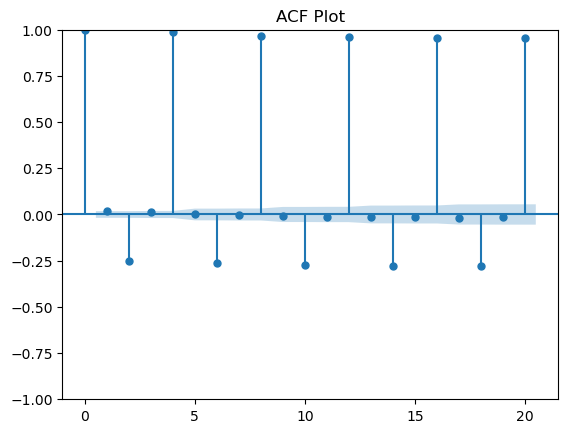

In [22]:
plot_acf(series, lags=20)
plt.title("ACF Plot")
plt.show()

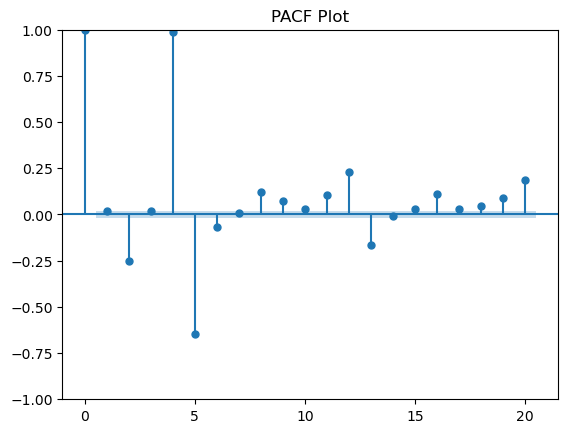

In [23]:
plot_pacf(series, lags=20)
plt.title("PACF Plot")
plt.show()

ACF and PACF shows seasonality, hence why we chose to use SARIMA model (restarts every 4 lags)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(
    series,
    order=(1, 0, 0),            # (p, d, q)
    seasonal_order=(1, 0, 0, 4),# (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [ ]:
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           electricity_consumption   No. Observations:                11688
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 4)   Log Likelihood              -58550.369
Date:                           Sat, 21 Jun 2025   AIC                         117106.739
Time:                                   09:24:21   BIC                         117128.836
Sample:                                        0   HQIC                        117114.161
                                         - 11688                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6551      0.004    169.869      0.000       0.647       0.663
ar.S.L4        0.9960      0.001   1279.866

In [24]:
train = pd.read_csv('train_filtered2.csv')
test = pd.read_csv('test_filtered2.csv')

In [ ]:
model = SARIMAX(train['electricity_consumption'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 4),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

In [ ]:
forecast = results.forecast(steps=len(test))

In [ ]:
test['electricity_consumption_predicted'] = forecast.values

In [ ]:
test.head()

,ID,temperature_2m_max,temperature_2m_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_direction_10m_dominant,electricity_consumption_predicted
0,cluster_1_2022-01-01,15.2,7.9,21902.986667,29784.506667,22.2,172.732245,354.573438
1,cluster_2_2022-01-01,15.9,4.1,23550.080000,30647.540000,22.7,163.972679,506.408236
2,cluster_3_2022-01-01,18.6,4.9,24179.643333,31545.103333,15.5,198.645137,703.774540
3,cluster_4_2022-01-01,13.3,3.9,23839.203333,30766.446667,16.1,183.517316,988.760224
4,cluster_1_2022-01-02,14.1,8.1,21018.193333,29847.110000,34.4,223.335840,353.411224


In [ ]:
split_index = int(len(train) * 0.8)
train_part = train.iloc[:split_index]
test_part = train.iloc[split_index:]

In [ ]:
model = SARIMAX(train_part['electricity_consumption'],
                order=(1, 0, 0), seasonal_order=(1, 0, 0, 4),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

In [ ]:
forecast = results.forecast(steps=len(test_part))

In [ ]:
rmse_score = np.sqrt(mean_squared_error(test_part['electricity_consumption'], forecast))
print(f"RMSE: {rmse_score:.4f}")

RMSE: 508.6451


In [ ]:
y_pred = y_pred.reset_index(drop=True)

In [ ]:
submission = pd.DataFrame({
    'ID': test['ID'],  # Ganti sesuai kolom unik jika ada
    'electricity_consumption': y_pred
})

In [ ]:
submission.to_csv('submission2.csv', index=False)

### LSTM

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [32]:
series = train['electricity_consumption'].values.reshape(-1, 1)
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

In [33]:
series_test = test['electricity_consumption'].values.reshape(-1, 1) if 'electricity_consumption' in test.columns else None

In [34]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [35]:
seq_length = 12  # Number of previous time steps to use
X, y = create_sequences(series_scaled, seq_length)

In [36]:
split_idx = len(train) - len(test)
X_train = X[:split_idx - seq_length]
y_train = y[:split_idx - seq_length]

In [37]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0441
Epoch 2/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0067
Epoch 3/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0013
Epoch 4/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4998e-04
Epoch 5/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4051e-04
Epoch 6/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 6.0299e-04
Epoch 7/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5.3237e-04
Epoch 8/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5.1856e-04
Epoch 9/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4.2780e-04
Epoch 10/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.9694e-04
Epoch 11/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.5691e-04
Epoch 12/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.4097e-04
Epoch 13/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.4967e-04
Epoch 14/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.2040e-04
Epoch 15/20

In [38]:
input_seq = series_scaled[-seq_length:].reshape(1, seq_length, 1)
predictions = []

In [39]:
for _ in range(len(test)):
    pred = model.predict(input_seq, verbose=0)[0]
    predictions.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)

In [40]:
y_pred = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

In [41]:
submission = pd.DataFrame({
    'ID': test['ID'].values,
    'electricity_consumption': y_pred
})

In [44]:
submission.to_csv('submission5.csv', index=False)

In [43]:
# rmse_score = np.sqrt(mean_squared_error(y_test_inv, y_pred))
# print(f"LSTM RMSE: {rmse_score:.4f}")

In [ ]:
# Make sure y_pred is 1D
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Optional: Also inverse y_test for evaluation
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Reset index just to be safe and ensure they match
submission = pd.DataFrame({
    'ID': test['ID'].reset_index(drop=True),
    'electricity_consumption': pd.Series(y_pred)
})

# Save submission if needed
submission.to_csv('submission4.csv', index=False)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [27]:
df = pd.read_csv('submission4.csv')

In [28]:
missing_percent = df.isnull().sum() / len(train) * 100
print(missing_percent)

ID                         0.000000
electricity_consumption    9.103354
dtype: float64


In [25]:
test.shape

(3400, 7)

In [29]:
df.shape

(3400, 2)